In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

data = pd.read_csv('C:\\Users\\LOQ\\Downloads\\netflix1.csv')


In [ ]:
required_columns = ['director', 'cast', 'country']
available_columns = [col for col in required_columns if col in data.columns]

if available_columns:
    data.dropna(subset=available_columns, inplace=True)
else:
    print("Some critical columns are missing and cannot be processed.")

data.drop_duplicates(inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
print(data.dtypes)


show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [ ]:
data.drop(columns=['unnecessary_column'], inplace=True, errors='ignore')


C:\Users\LOQ\AppData\Local\Temp\ipykernel_2244\3868055953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


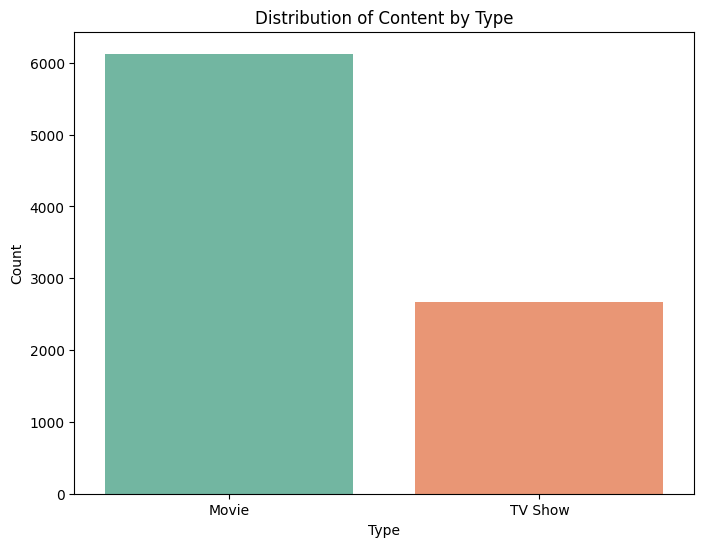

In [ ]:
type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_2244\845162383.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


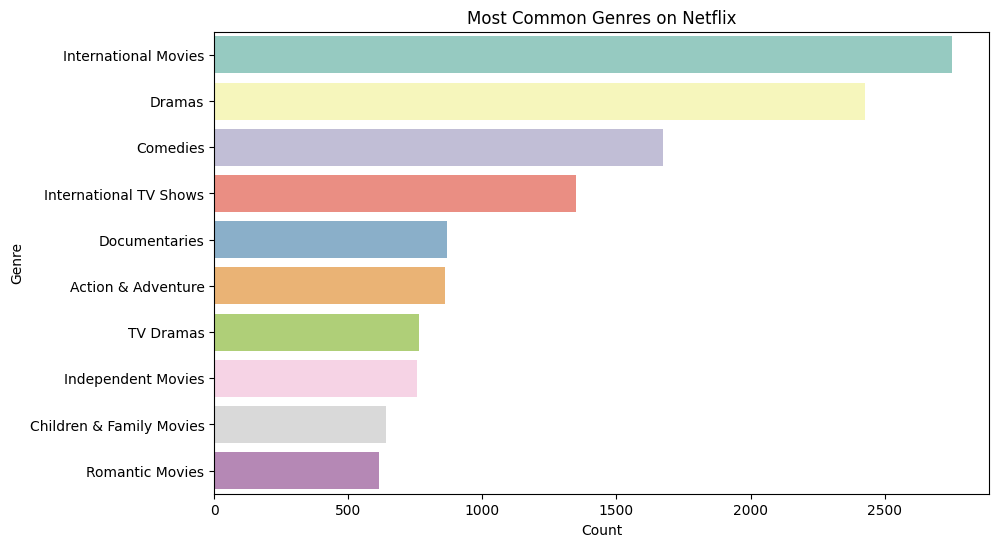

In [ ]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_2244\2533443450.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


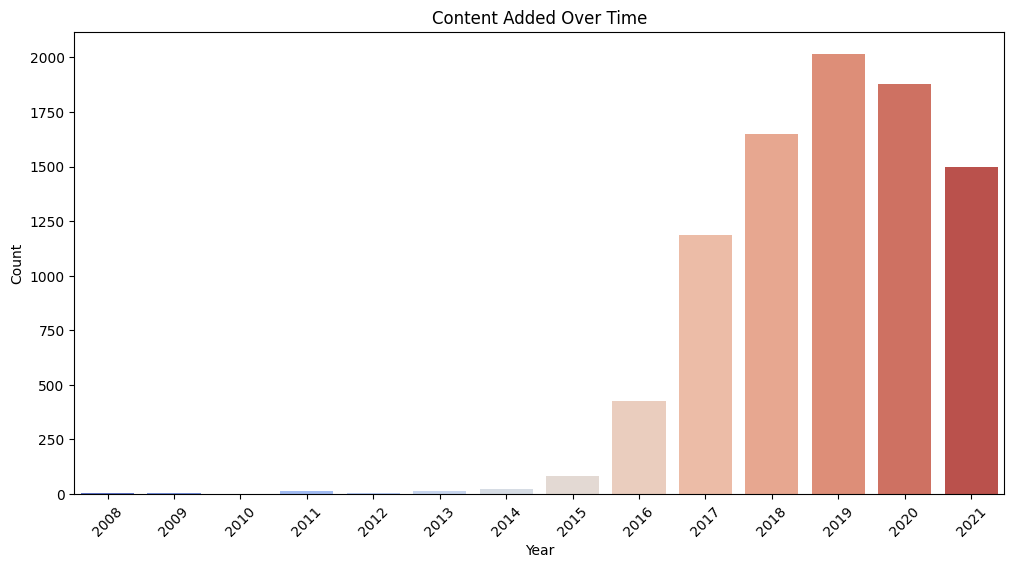

In [ ]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_2244\1405477472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


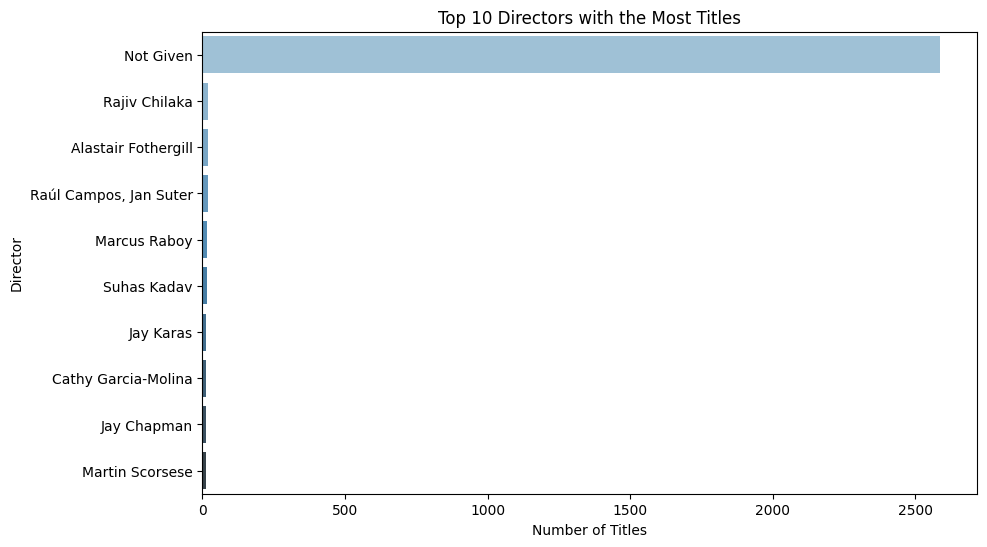

In [ ]:
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [ ]:
# Generate word cloud for movie titles
#movie_titles = data[data['type'] == 'Movie']['title']
#wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()
